## Importing Libraries

In [127]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import pickle
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [54]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Feature + Label division

In [56]:
y = df['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [57]:
X_cols = [col for col in df.columns if col !='Churn']
X = df[X_cols]
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


## Checking NA values

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [59]:
from sklearn.impute import SimpleImputer
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'],errors = 'coerce')
imputer = SimpleImputer(strategy='mean')
X['TotalCharges'] = imputer.fit_transform(X[['TotalCharges']])

In [60]:
len(df)

7043

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Conclusion: There were 11 NA columns. They were filled with the Mean Total Charges value

## Checking Categorizable columns

In [62]:
y.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [63]:
for col in X.columns:
    if(col != 'customerID' and col!='tenure' and col!='MonthlyCharges' and col!= 'TotalCharges'):
        print("****************************")
        print(X[col].value_counts())
        print("****************************")

****************************
gender
Male      3555
Female    3488
Name: count, dtype: int64
****************************
****************************
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
****************************
****************************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
****************************
****************************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
****************************
****************************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
****************************
****************************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
****************************
****************************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
****************************
****************************
OnlineSecurity
No                     3498


### Categorizing Columns

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
for col in X.columns:
    if(col != 'customerID' and col!='tenure' and col!='MonthlyCharges' and col!= 'TotalCharges' and col!='SeniorCitizen'):
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

        class_labels = le.classes_
        encoded_labels = range(len(class_labels))
        
        print(f"Label to Class Mapping for {col}:")
        for label, encoded_label in zip(class_labels, encoded_labels):
            print(f"  {label} -> {encoded_label}")
        
        print() 

Label to Class Mapping for gender:
  Female -> 0
  Male -> 1

Label to Class Mapping for Partner:
  No -> 0
  Yes -> 1

Label to Class Mapping for Dependents:
  No -> 0
  Yes -> 1

Label to Class Mapping for PhoneService:
  No -> 0
  Yes -> 1

Label to Class Mapping for MultipleLines:
  No -> 0
  No phone service -> 1
  Yes -> 2

Label to Class Mapping for InternetService:
  DSL -> 0
  Fiber optic -> 1
  No -> 2

Label to Class Mapping for OnlineSecurity:
  No -> 0
  No internet service -> 1
  Yes -> 2

Label to Class Mapping for OnlineBackup:
  No -> 0
  No internet service -> 1
  Yes -> 2

Label to Class Mapping for DeviceProtection:
  No -> 0
  No internet service -> 1
  Yes -> 2

Label to Class Mapping for TechSupport:
  No -> 0
  No internet service -> 1
  Yes -> 2

Label to Class Mapping for StreamingTV:
  No -> 0
  No internet service -> 1
  Yes -> 2

Label to Class Mapping for StreamingMovies:
  No -> 0
  No internet service -> 1
  Yes -> 2

Label to Class Mapping for Contract:

### Dropping Unnecessary Columns

In [66]:
X = X.drop('customerID',axis =1)

In [67]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


## Categorizing the Label Churn

In [68]:
le = LabelEncoder()
y = le.fit_transform(y)
class_labels = le.classes_
encoded_labels = range(len(class_labels))

print(f"Label to Class Mapping for Churn:")
for label, encoded_label in zip(class_labels, encoded_labels):
    print(f"  {label} -> {encoded_label}")

Label to Class Mapping for Churn:
  No -> 0
  Yes -> 1


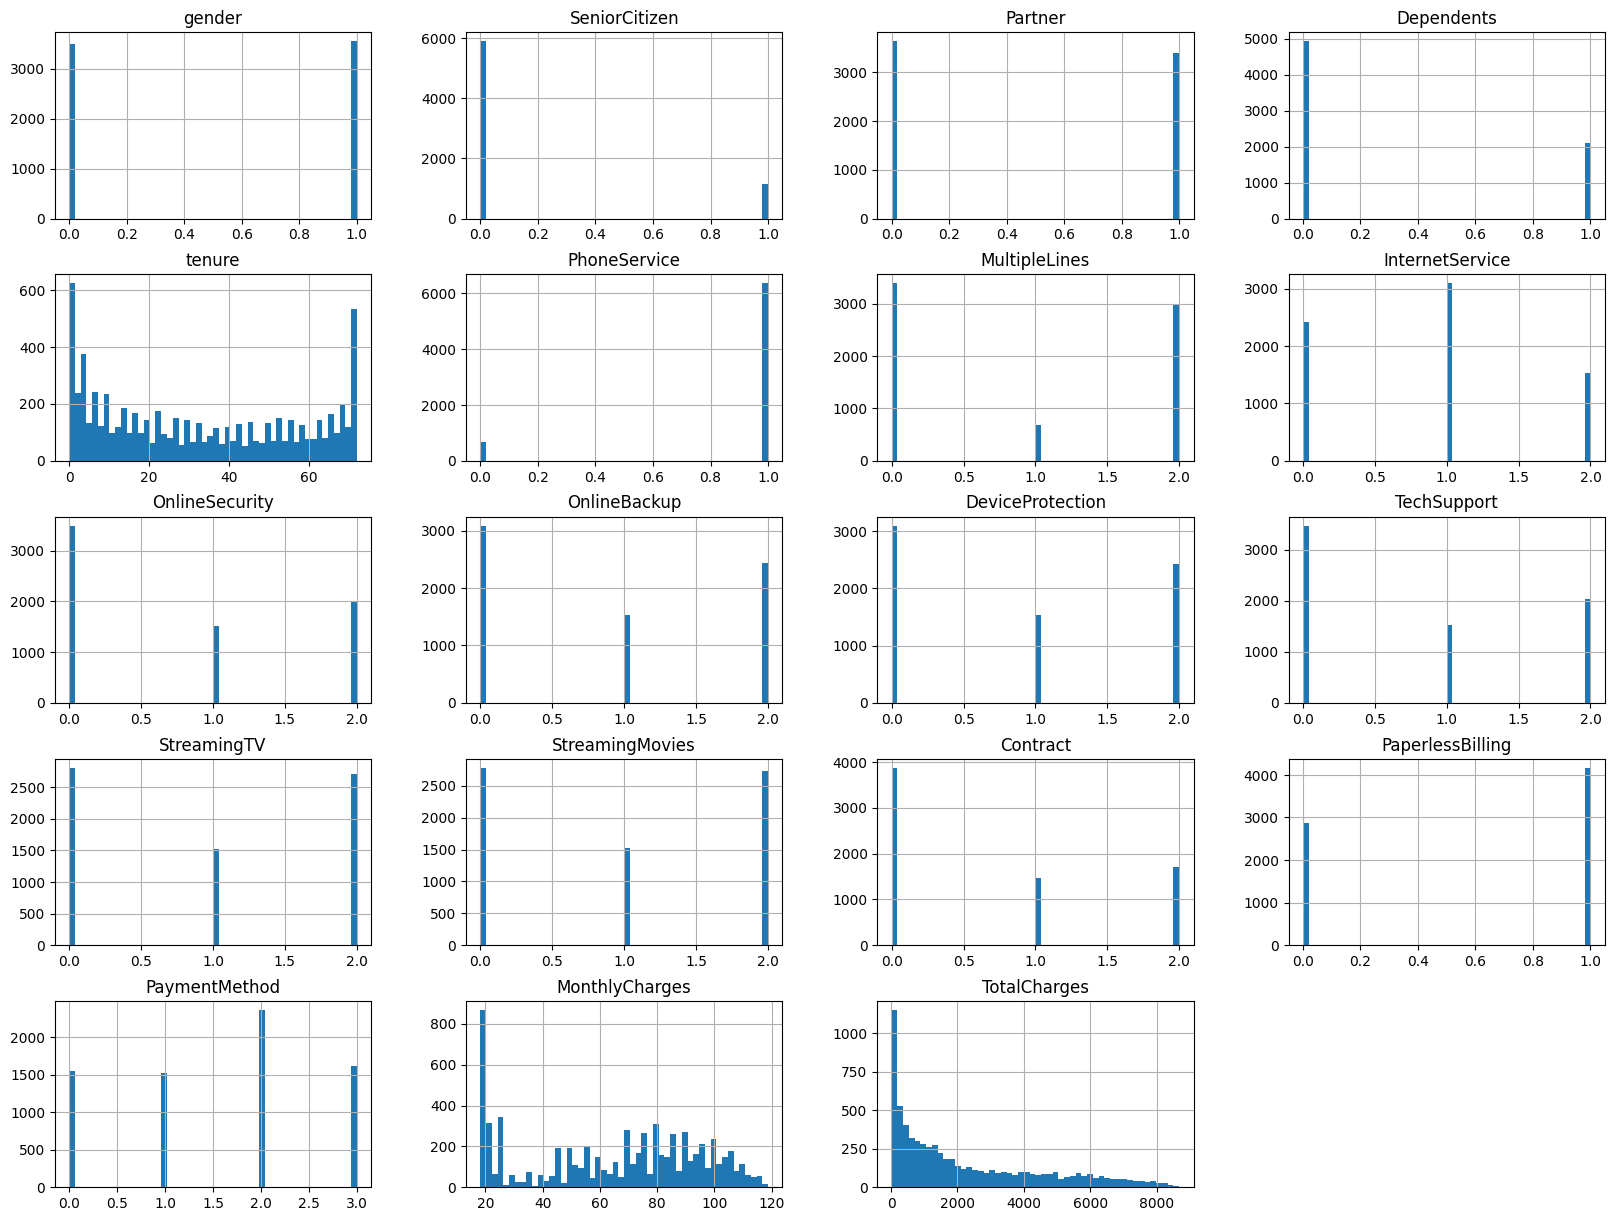

In [69]:
X.hist(bins=50, figsize=(20,15))
plt.show()

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


### Correlation Matrix

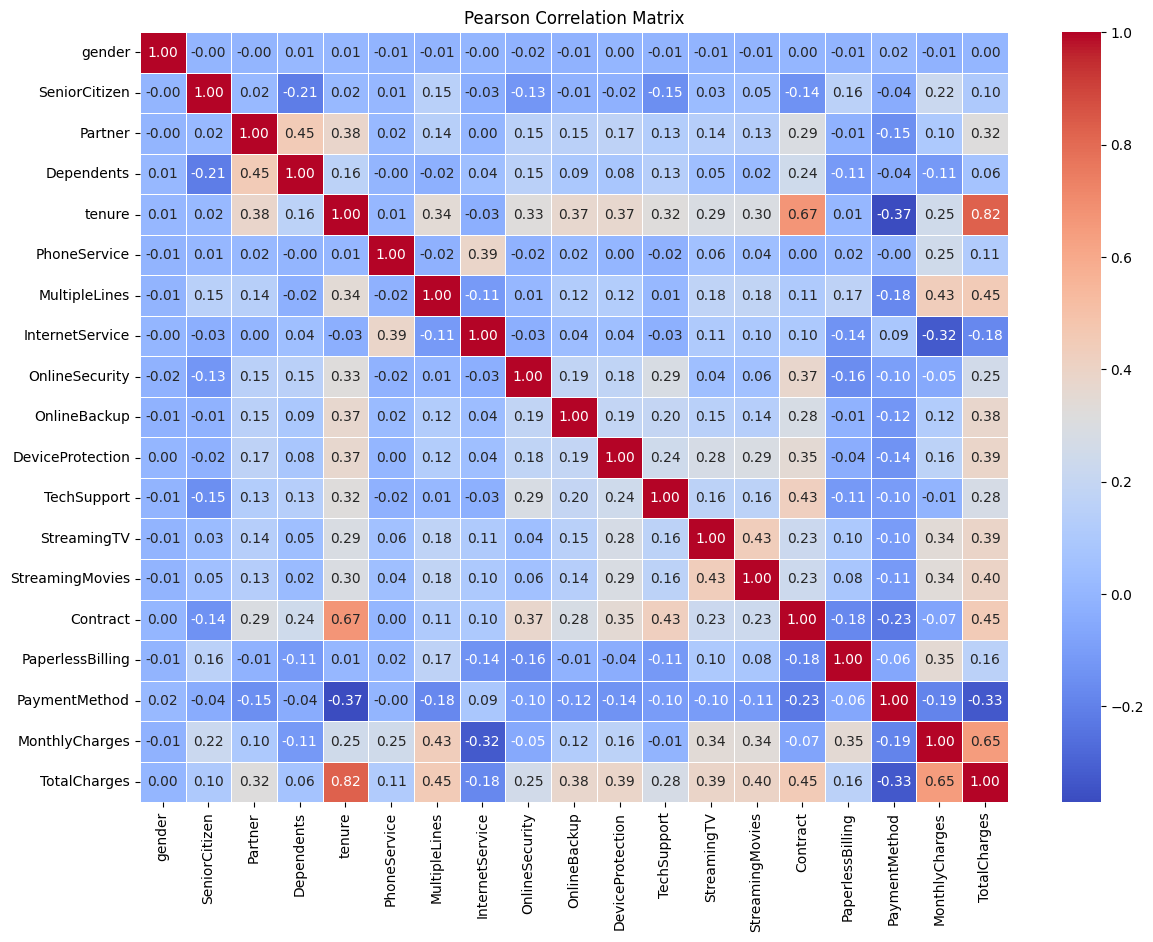

In [71]:
correlation_matrix = X.corr(method='pearson')


plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges       -0.199428
dtype: float64


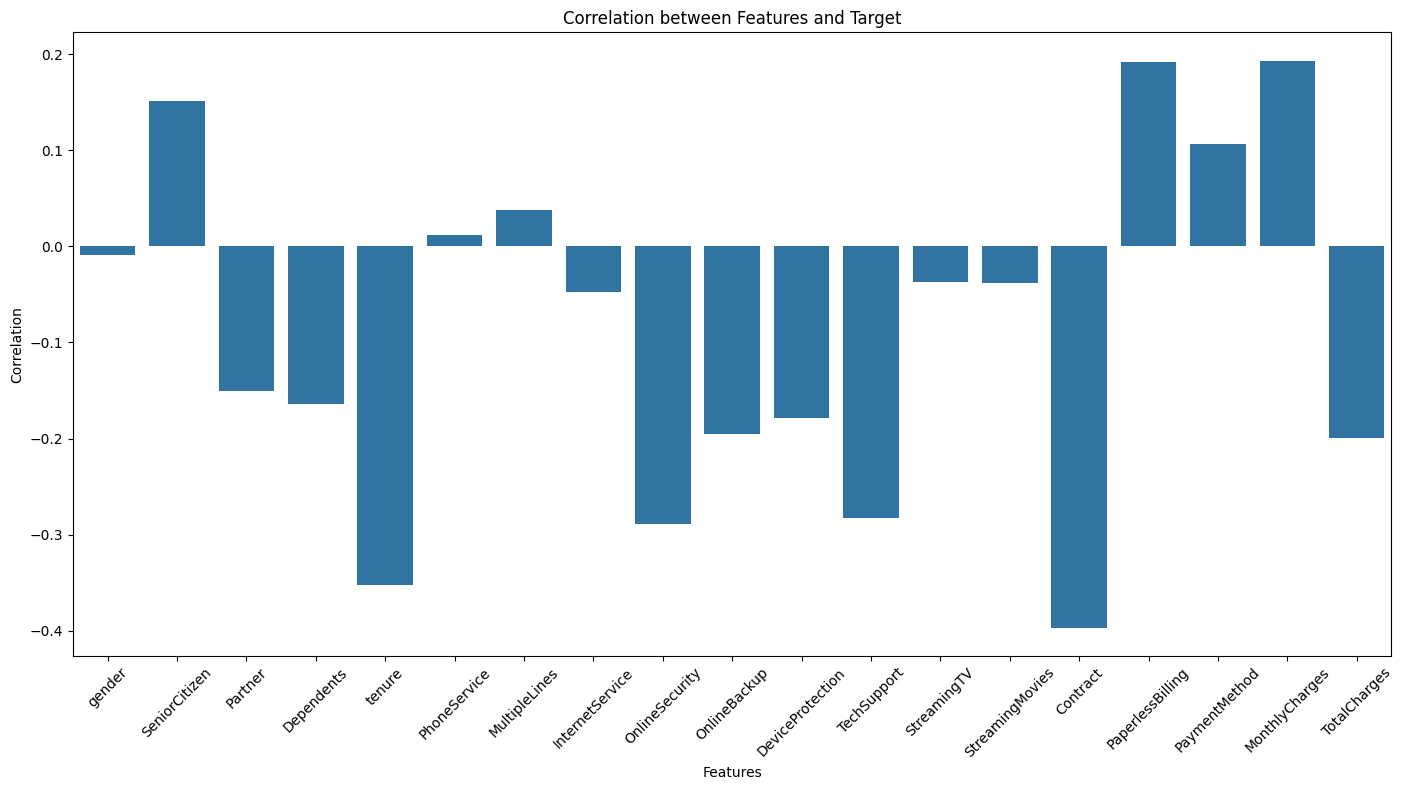

In [72]:
Y_series = pd.Series(y)

# Calculate correlation between Y and X
correlation_with_Y = X.apply(lambda x: x.corr(Y_series))

# Print correlation values
print(correlation_with_Y)

# Plot correlation values
plt.figure(figsize=(14, 8))
sns.barplot(x=correlation_with_Y.index, y=correlation_with_Y.values)
plt.title('Correlation between Features and Target')
plt.xlabel('Features')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()  # Ensure labels fit within plot area
plt.ylabel('Correlation')
plt.show()

In [73]:
X = X.drop(["gender","PhoneService","MultipleLines","InternetService","StreamingTV","StreamingMovies"],axis = 1)
#X = X[["Contract","tenure","MonthlyCharges"]]

In [74]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65


## Data Augmenting

In [225]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

## Train Test Split

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 42) #,stratify =y)

### Normalizing Values

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train["MonthlyCharges"] = scaler.fit_transform(X_train["MonthlyCharges"].values.reshape(-1, 1))

In [77]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1869,0,1,1,72,1,1,1,1,2,0,1,0.058209,1734.65
4528,0,0,0,44,0,2,2,0,0,1,1,0.695522,3973.20
6344,1,1,0,38,0,0,0,0,0,1,0,0.564179,2869.85
6739,0,0,0,4,0,0,0,0,0,1,2,0.374627,238.50
432,0,0,0,2,2,0,2,0,0,0,2,0.350249,119.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,0,1,2,0,0,0,0,1,2,0.763682,95.00
5191,0,1,1,23,2,2,2,2,2,1,1,0.724876,2198.30
5226,0,1,1,12,1,1,1,1,0,1,2,0.028856,306.05
5390,1,0,0,12,0,0,2,0,0,1,2,0.807960,1200.15


# SGD

In [78]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
clf = SGDClassifier(random_state = 42)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_train)
print(f'Train Accuracy = {accuracy_score(y_train, y_pred)}')
print(f'Train Recall = {recall_score(y_train, y_pred)}')
print(f'Train Precision = {precision_score(y_train, y_pred)}')
print(f'Train F1 = {f1_score(y_train, y_pred)}')

print()

y_pred = clf.predict(X_test)
print(f'Test Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Test Recall = {recall_score(y_test, y_pred)}')
print(f'Test Precision = {precision_score(y_test, y_pred)}')
print(f'Test F1 = {f1_score(y_test, y_pred)}')

Train Accuracy = 0.7686267958569997
Train Recall = 0.42911153119092627
Train Precision = 0.5870689655172414
Train F1 = 0.4958136148525664

Test Accuracy = 0.630085146641438
Test Recall = 0.9113475177304965
Test Precision = 0.41252006420545745
Test F1 = 0.5679558011049723


# SVC

In [79]:
from sklearn.svm import SVC
m_clf = SVC(random_state = 42)
m_clf.fit(X_train,y_train)
y_pred = m_clf.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred, average="macro")}')
print(f'Precision = {precision_score(y_test, y_pred, average="macro")}')
print(f'F1 = {f1_score(y_test, y_pred, average="macro")}')

Accuracy = 0.7332071901608326
Recall = 0.5
Precision = 0.3666035950804163
F1 = 0.4230349344978166


## Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 20, random_state = 42)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred, average="macro")}')
print(f'Precision = {precision_score(y_test, y_pred, average="macro")}')
print(f'F1 = {f1_score(y_test, y_pred, average="macro")}')

Accuracy = 0.7455061494796594
Recall = 0.7204301075268817
Precision = 0.6912298251045959
F1 = 0.6999139846227724


In [94]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 55, min_samples_split = 60, min_samples_leaf = 16)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred, average="macro")}')
print(f'Precision = {precision_score(y_test, y_pred, average="macro")}')
print(f'F1 = {f1_score(y_test, y_pred, average="macro")}')

Accuracy = 0.7918637653736992
Recall = 0.7576824525280257
Precision = 0.7371300928031259
F1 = 0.7455375511025903


## Hyperparameter tuning with Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                  # 5-fold cross-validation
    n_jobs=-1,            # Use all available cores
    verbose=2,            # Print progress
    scoring='accuracy'    # Metric to optimize
)

grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("\nBest parameters found:")
print(grid_search.best_params_)
print(f"\nBest cross-validation score: {grid_search.best_score_:.4f}")

# Evaluate on test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"\nTest set score with best parameters: {test_score:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best parameters found:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Best cross-validation score: 0.8019

Test set score with best parameters: 0.7644


## KNeighbor Classifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [100]:
pred_knn = knn.predict(X_test)
print(f'Accuracy = {accuracy_score(pred_knn, y_test)}')

Accuracy = 0.7568590350047304


In [122]:
X_train.shape

(5986, 13)

## Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(13,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4586 - loss: 116.8456
Epoch 2/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5605 - loss: 1.2170
Epoch 3/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6883 - loss: 1.2498
Epoch 4/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7262 - loss: 0.8623
Epoch 5/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7189 - loss: 2.2797
Epoch 6/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6918 - loss: 1.6845
Epoch 7/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7367 - loss: 1.2653
Epoch 8/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7423 - loss: 0.8802
Epoch 9/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7560 - loss: 0.7266
Epoch 10/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7637 - loss: 0.6612
Epoch 11/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7615 - loss: 0.6790
Epoch 12/1000
188/188 ━━━━━━

In [126]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 26)                  │             364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │             405 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,357 (9.21 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,572 (6.14 KB)

## Saving Models

In [128]:
def save_sklearn_model(model, filepath):
    with open(filepath, 'wb') as f:
        pickle.dump(model, f)

In [129]:
save_sklearn_model(clf, os.path.join('models','SGD.pkl'))
save_sklearn_model(m_clf, os.path.join('models','SVC.pkl'))
save_sklearn_model(rf_clf, os.path.join('models','RandomForest.pkl'))

In [132]:
model.save(os.path.join('models','NeuralNetwork.keras'))
model.save(os.path.join('models','NeuralNetwork.h5'))